# Criando graficos com matplotlib

O [matplotlib](https://matplotlib.org/index.html) e uma biblioteca do python muito util para criar imagens e graficos 2D.

O modulo principal que iremos usar e o pyplot e iremos importa-lo, assim como fizemos com a biblioteca pandas.


In [3]:
#Importando as bibliotecas

import matplotlib.pyplot as plt
import pandas as pd

#Recriando os dados do tutorial 2

df = pd.read_csv('idadeserieneeracadez17.csv' , 
        sep = ";", encoding = 'latin-1', header = 0, usecols = ['DESCSERIE', 'SEXO' , 'QTDE'])

pivotSexo = df.pivot_table(index = 'DESCSERIE', columns = 'SEXO', aggfunc=sum)


## Criando um grafico simples

O proprio pacote pandas ja conta com funcoes embutidas para criacao de graficos. 
Usando como exemplo a nossa pivot table, e baste simples ter uma visualizacao grafica basica dos dados:

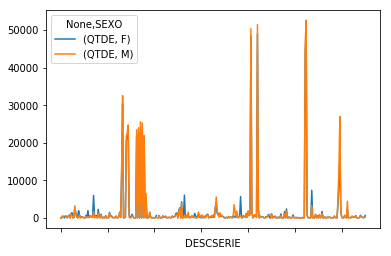

In [6]:
pivotSexo.plot()


In [7]:
Entretanto, podemos utilizar a biblioteca plt pra ter maior flexibilidade para criar nossos graficos.
Vamos utilizar a variavel mathClubSexo que obtivemos anteriormente, para criar um grafico da porcentagem de meninos e meninas no clube de matematica:

SyntaxError: invalid syntax (<ipython-input-7-b689e150b12c>, line 1)

      SEXO
QTDE  F       1362.0
      M       1601.0
Name: CLUBE MATEMATIC, dtype: float64


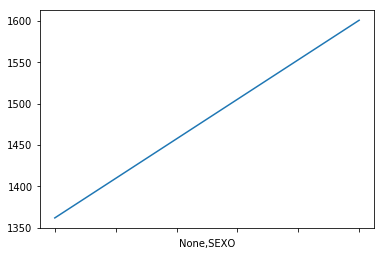

In [12]:
mathClubSexo = pivotSexo.loc['CLUBE MATEMATIC']
print(mathClubSexo)
mathClubSexo.plot()
plt.show()

Esse grafico entretanto nao e o mais adequado, entao vamos ver algumas alternativas de representacao grafica do matplotlib.

## Grafico de pizza
Por padrao, o grafico gerado e uma linha, que nao e muito util para o tipo de dados que queremos representar.
Um grafico de pizza(ou pie chart, em ingles) seria mais adequado. Vamos usar o [plt.pie](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html) para criar um grafico de pizza com nossos dados:

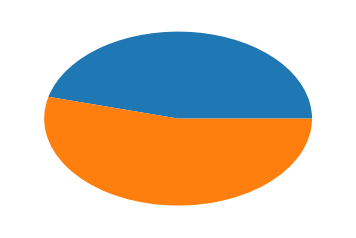

In [13]:
plt.pie(mathClubSexo)
plt.show()

In [14]:
## Adicionando detalhes

O grafico ainda esta muito cru e com poucas informacoes. Vamos melhora-lo, colocando labels que indicam a que dado cada setor se refere. Para isso, vamos alterar a variavel labels do nosso pie chart.

Em seguida, vamos adicionar um titulo, com plt.title

SyntaxError: invalid syntax (<ipython-input-14-a709197088be>, line 3)

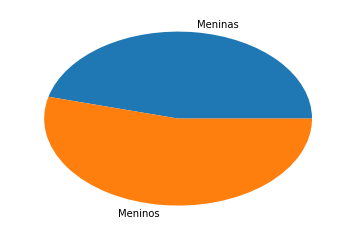

In [15]:
plt.pie(mathClubSexo, labels = ['Meninas', 'Meninos'])
plt.show()

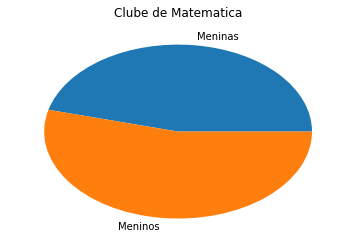

In [16]:
plt.pie(mathClubSexo, labels = ['Meninas', 'Meninos'])
plt.title('Clube de Matematica') #adicionando o título
plt.show()

In [17]:
O plt.pie tem diversos atributos que podemos alterar, customizando muito o visual do nosso grafico. Por exemplo, podemos passar um vetor com cores, para determinar exatamente as cores que queremos em cada setor.

SyntaxError: invalid syntax (<ipython-input-17-7e0a5e34475a>, line 1)

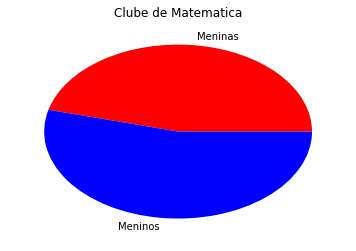

In [18]:
plt.pie(mathClubSexo, labels = ['Meninas', 'Meninos'], colors = ['red', 'blue'])
plt.title('Clube de Matematica') #adicionando o título
plt.show()

In [20]:
O plt ja conta com alguns estilos padrao:

SyntaxError: invalid syntax (<ipython-input-20-b3319c757d59>, line 1)

In [21]:
plt.style.available

['seaborn-pastel',
 'Solarize_Light2',
 'seaborn-talk',
 'seaborn-colorblind',
 'seaborn',
 'seaborn-dark-palette',
 'ggplot',
 'dark_background',
 'seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-deep',
 '_classic_test',
 'seaborn-dark',
 'seaborn-bright',
 'fast',
 'seaborn-poster',
 'tableau-colorblind10',
 'seaborn-darkgrid',
 'bmh',
 'fivethirtyeight',
 'seaborn-ticks',
 'seaborn-notebook',
 'classic',
 'seaborn-white',
 'seaborn-paper',
 'grayscale']

In [22]:
Vamos escolher o estilo seaborn-colorblind, que e um estilo amigavel para pessoas com daltonismo. Assim, todos os graficos que criarmos depois desta celula seguira esse mesmo padrao.

SyntaxError: invalid syntax (<ipython-input-22-c9ebd90e04f8>, line 1)

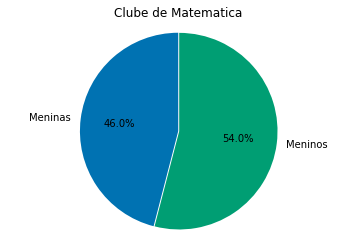

In [24]:
plt.style.use('seaborn-colorblind')
plt.pie(mathClubSexo, labels = ['Meninas', 'Meninos'], autopct='%1.1f%%',
                               startangle=90, explode = [0.0, 0.01])
plt.axis('equal') #Fazer o grafico ser um circulo perfeito
plt.title('Clube de Matematica') #adicionando o título
plt.show()


Com mais algumas modificacoes, ja temos uma visualizacao muito melhor do nosso conjunto de dados:

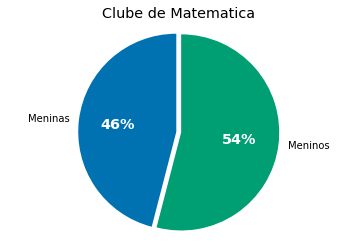

In [27]:
fig = plt.pie(mathClubSexo, labels = ['Meninas', 'Meninos'], autopct='%1.f%%',
                               startangle=90, explode = [0.0, 0.05])
plt.axis('equal') #Fazer o grafico ser um circulo perfeito
plt.title('Clube de Matematica', fontsize = 'x-large') #adicionando o 
patches, texts, autotexts = fig
plt.setp(autotexts, size='x-large', color = 'w', weight = 'bold')
plt.savefig('Exemplos/Clube de Matematica.png', dpi = 300)

Explicando as modificacoes realizadas:

* labels = ['Meninas', 'Meninos'] => Adiciona as legendas aos setores

* autopct='%1.f%%' => adiciona as porcentagens dentro dos setores

* startangle=90 => Determina o angulo inicial para divisao dos setores

* explode = [0.0, 0.05] => Cria a "quebra" entre as parte dos setores do grafico

* plt.setp(autotexts, size='x-large', color = 'w', weight = 'bold') => Modifica a fonte das porcentagens

* plt.savefig('Exemplos/Clube de Matematica.png', dpi = 300) => Salva a figura no destino especificado